#**1.8. Manejo de archivos con python**


Para abrir un archivo en Python, utiliza la función ```open()```. Esta función toma dos argumentos: el nombre del archivo y el modo en el que se va a abrir el archivo (lectura, escritura, etc.).

```
archivo = open("nombre_del_archivo.txt", "r")
```



*   ```"r"```: Modo de lectura (read).
*   ```"w"```: Modo de escritura (write). Crea un nuevo archivo si no existe o sobrescribe el contenido si ya existe.
*   ```"a"```: Modo de apertura para añadir contenido (append) al final del archivo.
*   ```"b"```: Modo binario, se usa junto con "r", "w" o "a" para trabajar con archivos binarios (por ejemplo, "rb" para lectura binaria)









In [3]:
## Crea una variable donde almacene la ruta en tipo de dato de texto
ruta_archivo = "/content/5_out_G10_CP002455_long.fasta"

## Leer todo el archivo de una vez
archivo = open(AQUI-ARCHIVO, "AQUI-MODO")

###**1.8.1. Cerrar archivos**

Al terminar de acceder, editar o crear un archivo, es importante cerrarlo utilizando el método close().
- **close()**: Cierra el archivo abierto, liberando los recursos y asegurando que los cambios se escriban en el disco.


```
archivo.close()
```

In [ ]:
## Define instruccion para cerrar archivo


###**1.8.2. Leer archivos**
Puedes leer el contenido de un archivo línea por línea o como un solo bloque de texto.

- **read()**: Lee el contenido completo de un archivo y lo devuelve como una cadena de texto.

- **readline()**: Lee una línea del archivo y devuelve una cadena de texto. Se puede usar en un bucle para leer línea por línea.

* **readlines()**: Lee todas las líneas del archivo y las devuelve como una lista de cadenas de texto.

In [6]:
#Abre el archivo con el método open()

In [25]:
## Crea una variable donde almacene la ruta en tipo de dato de texto
ruta_archivo = "/content/5_out_G10_CP002455_long.fasta"

## Leer todo el archivo de una vez
archivo = open(ruta_archivo, "r")

In [ ]:
# Crear un diagrama de violín para la longitud de las secuencias en seq
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_dr100, y=data_dr100['seq'].str.len(), color='skyblue')
# Obtener el total de datos
total_datos = len(data_dr100)
# Agregar el número total de datos en la esquina superior derecha
plt.text(0.95, 0.95, f'n = {total_datos}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=15)
# Etiquetar los ejes y el título del gráfico
plt.xlabel('Distribución')
plt.ylabel('Longitud de Repeticiones Directas sin redundancia')
plt.title('Diagrama de Violín de Longitud de Repeticiones Directas al 100% de identidad')

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el diagrama de violín
plt.show()

Ahora vamos a probar cada modo de lectura de los archivos y observar las diferencias.

In [23]:
# Lectura con el metodo read()


# Lectura con el metodo readline()


# Lectura con el metodo readlines()


### Método recomendado: with statement

In [ ]:
# Forma segura - se cierra automáticamente
with open("mi_archivo.txt", "r") as archivo:
    contenido = archivo.read()
    print(contenido)
# El archivo se cierra automáticamente aquí

In [ ]:
# 1. Leer todo el archivo
with open("datos.txt", "r", encoding="utf-8") as archivo:
    todo = archivo.read()
    print(todo)

In [ ]:
# 2. Leer línea por línea
with open("datos.txt", "r", encoding="utf-8") as archivo:
    for linea in archivo:
        print(f"Línea: {linea.strip()}")  # strip() quita saltos de línea

In [ ]:
# 3. Leer todas las líneas en una lista
with open("datos.txt", "r", encoding="utf-8") as archivo:
    lineas = archivo.readlines()
    print(f"Total de líneas: {len(lineas)}")
    print(f"Primera línea: {lineas[0].strip()}")

#### Manejo de errores

In [ ]:
try:
    with open("archivo_inexistente.txt", "r", encoding="utf-8") as archivo:
        contenido = archivo.read()
except FileNotFoundError:
    print("¡Ups! El archivo no existe")
except PermissionError:
    print("No tienes permisos para leer este archivo")
except Exception as e:
    print(f"Error inesperado: {e}")

###**1.8.3. Escribir archivos**

- open(nombre_archivo, modo): También se usa para abrir archivos en modo escritura ("w"), modo append ("a") y otros modos.

- write(texto): Escribe una cadena de texto en el archivo abierto en modo escritura. Si el archivo no existe, lo crea. Si existe, sobrescribe el contenido.

- writelines(lista_de_texto): Escribe una lista de cadenas de texto en el archivo, una por línea.

In [ ]:
filename = "output.txt"
f = open(filename, "w") #abrir archivo en modo de escritura (sobre escribe si el archivo existe)
f.write("hello there!") #contenido a escribir en el archivo (tipo de dato)
f.close()

In [ ]:
filename = "output.txt"
f = open(filename, "a") #abrir archivo en modo append (concatena)
f.write("hello there!") #escribir en el archivo
f.close()

## Analisis de longitudes de las secuencias en el archivo FASTA

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

secuencias = []
ids = []

with open(ruta_archivo, "r") as archivo:
  lines = archivo.readlines()

  for line in lines:
        if line.startswith(">"):
            # Almacenar en la lista ids (quitando el ">" y salto de línea)
            ids.append(line[1:].strip())
        else:
            # Almacenar en la lista secuencias (quitando salto de línea)
            secuencias.append(line.strip())


In [30]:
# Calcular longitudes de las secuencias
#longitudes = [len(seq) for seq in secuencias]

In [31]:
# Crear el DataFrame
df = pd.DataFrame({
    'ID': ids,
    'Secuencia': secuencias,
    'Longitud': longitudes
})

In [39]:
# Crear el DataFrame
df = pd.DataFrame({
    'ID': ids,
    'Secuencia': secuencias
})

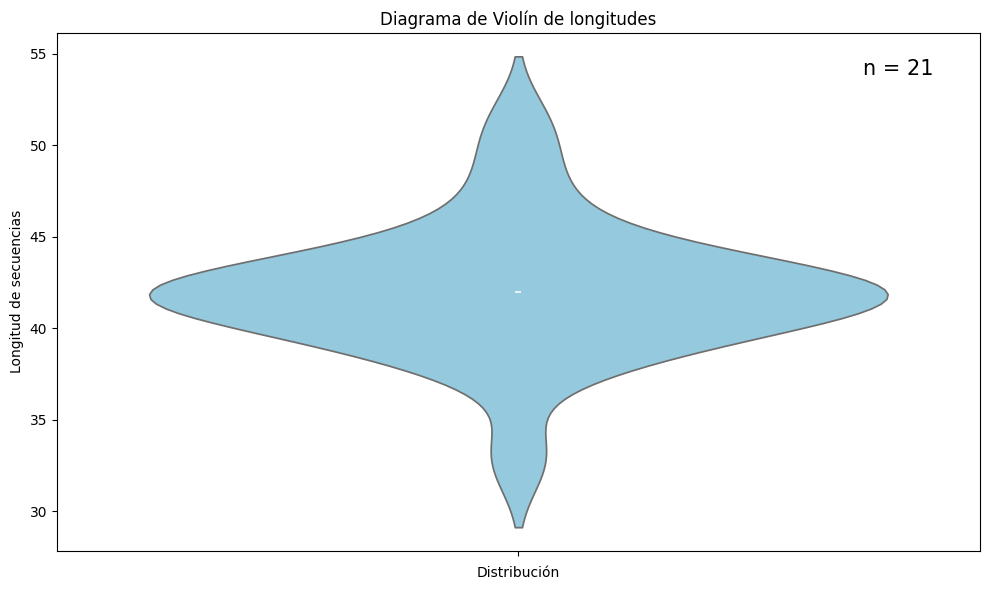

In [41]:
# Crear un diagrama de violín para la longitud de las secuencias en seq
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y=df['Secuencia'].str.len(), color='skyblue')
# Obtener el total de datos
total_datos = len(df)
# Agregar el número total de datos en la esquina superior derecha
plt.text(0.95, 0.95, f'n = {total_datos}', ha='right', va='top', transform=plt.gca().transAxes, fontsize=15)
# Etiquetar los ejes y el título del gráfico
plt.xlabel('Distribución')
plt.ylabel('Longitud de secuencias')
plt.title('Diagrama de Violín de longitudes')

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el diagrama de violín
plt.show()

## 1.8.4 Abrir archivos en drive

In [ ]:
## mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = "/content/drive/MyDrive/curso_python_sample_files/text.txt"
# you can r click and check for the path in "copy path"

## Manejo de archivos extraidos de APIs


In [ ]:
import requests

uniprot_id = "P04949"
url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"

response = requests.get(url)
data = response.json()

# Nombre de la proteína
print("Nombre:", data["proteinDescription"]["recommendedName"]["fullName"]["value"])

# Organismo
print("Organismo:", data["organism"]["scientificName"])

# Secuencia
sequence = data["sequence"]["value"]
print("Longitud de secuencia:", len(sequence))
print(sequence[:60] + "...")

In [ ]:
import csv

# Lista de UniProt IDs relacionadas con motilidad
uniprot_ids = [
    "P04949",  # FliC - flagelina
    "P0ABU9",  # MotA
    "P0ABV2",  # MotB
    "P0A6I9",  # FlhD
    "P0A940",  # CheA
    "P0AE67",  # CheY
    "P0AFJ5",  # CheW
    "P72151",  # PilA
    "Q9I4W3",  # PilT
    "Q9I4W4",  # PilB
    "Q1C402",  # GldA
    "Q1C403",  # GldB
    "Q5SHW0",  # SprB
]

In [ ]:
import requests

# Archivos de salida
csv_file = "proteinas_motilidad.csv"
fasta_file = "proteinas_motilidad.fasta"

# Función para obtener las info
def get_uniprot_json(uniprot_id):
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"
    r = requests.get(url)
    if r.status_code == 200:
        return r.json()
    else:
        print(f"Error con {uniprot_id}: {r.status_code}")
        return None

# Función para obtener las secuencias fasta

def get_uniprot_fasta(uniprot_id):
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.fasta"
    r = requests.get(url)
    if r.status_code == 200:
        return r.text
    else:
        return ""


In [ ]:
# Guardar anotaciones en CSV
with open(csv_file, "w", newline="") as csvfile, open(fasta_file, "w") as fastafile:
    writer = csv.writer(csvfile)
    writer.writerow(["UniProt_ID", "Nombre", "Organismo", "Función", "Longitud"])

    for uid in uniprot_ids:
        data = get_uniprot_json(uid)
        if data:
            # Intentar obtener nombre de varias fuentes
            name = "N/A"
            try:
                name = data.get("proteinDescription", {}).get("recommendedName", {}).get("fullName", {}).get("value", "N/A")
            except:
                if "proteinDescription" in data:
                    alt_names = data["proteinDescription"].get("submissionNames", [])
                    if alt_names:
                        name = alt_names[0].get("fullName", {}).get("value", "N/A")

            # Organismo
            organism = data.get("organism", {}).get("scientificName", "N/A")

            # Buscar una descripción funcional si existe
            function = "N/A"
            for comment in data.get("comments", []):
                if comment.get("commentType") == "FUNCTION":
                    texts = comment.get("texts", [])
                    if texts:
                        function = texts[0].get("value", "N/A")
                        break

            # Secuencia
            seq = data.get("sequence", {}).get("value", "")

            # Guardar en CSV
            writer.writerow([uid, name, organism, function, len(seq)])

            # Guardar en FASTA
            fasta = get_uniprot_fasta(uid)
            fastafile.write(fasta)

print("Descarga completada")
print(f"Anotaciones guardadas en {csv_file}")
print(f"Secuencias FASTA guardadas en {fasta_file}")